In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './../scripts')

In [2]:
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.figure import figaspect
import time

import ring_network as network
import sim_util as su
import ricciardi as ric
import integrate as integ

def imshowbar(fig,ax,A,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(imsh, cax=cax, orientation='vertical')

# Test creating networks

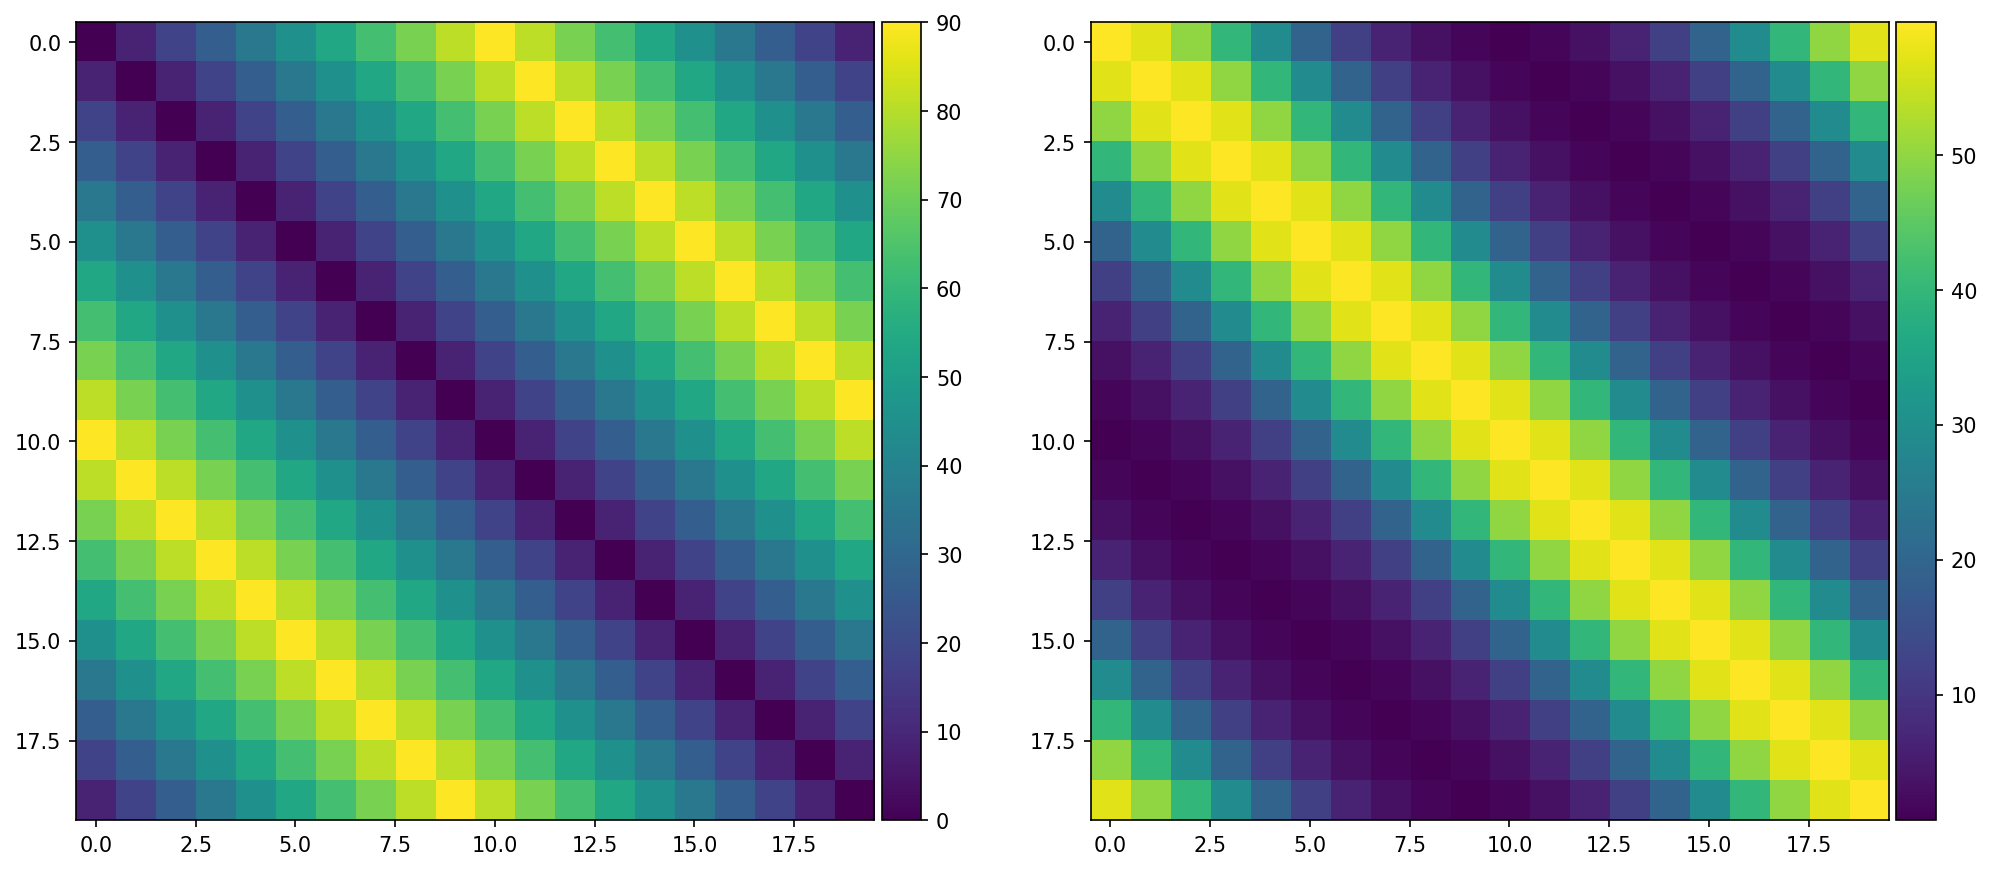

In [3]:
reload(network)

net = network.RingNetwork(Nori=20)

fig,axs = plt.subplots(1,2,figsize=(2*8,8),dpi=150)
imshowbar(fig,axs[0],net.get_ori_diff(True))
imshowbar(fig,axs[1],net.generate_full_kernel(30)*500/net.NC[0])

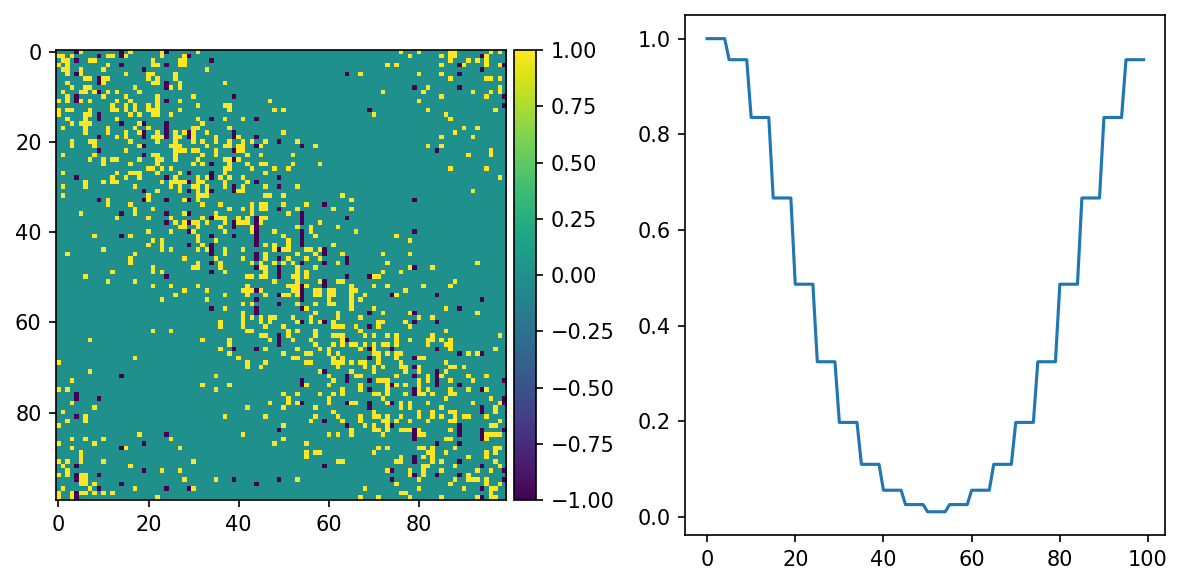

In [4]:
reload(network)

net = network.RingNetwork(NC=[4,1],Nori=20)
net.generate_disorder(np.array([[1,-1],[1,-1]]),30*np.ones((2,2)),
                      np.ones(2),30*np.ones(2),10)

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=150)
imshowbar(fig,axs[0],net.M,cmap='viridis')
axs[1].plot(net.H)

fig.tight_layout()

# Simulate a ring network

In [5]:
ri = ric.Ricciardi()
ri.set_up_nonlinearity('./../scripts/phi_int')

NtE = 100
T = np.linspace(0,NtE*ri.tE,round(NtE*ri.tE/(ri.tI/3))+1)
mask_time = T>(NtE/2*ri.tE)

Loading previously saved nonlinearity


In [6]:
reload(network)

net = network.RingNetwork(NC=[4,1],Nori=720)
net.generate_disorder(1e-3*np.array([[0.1,-0.8],[0.3,-0.7]]),
                      np.array([[30,20],[30,20]]),
                      500*1e-3*np.array([0.25,0.25]),
                      40*np.ones(2),500)

In [18]:
sol,_ = integ.sim_dyn(ri,T,0.0,net.M,20*net.H,net.H,net.C_all[0],net.C_all[1],mult_tau=True,max_min=30)

5.399199740654059
6.842188388569893


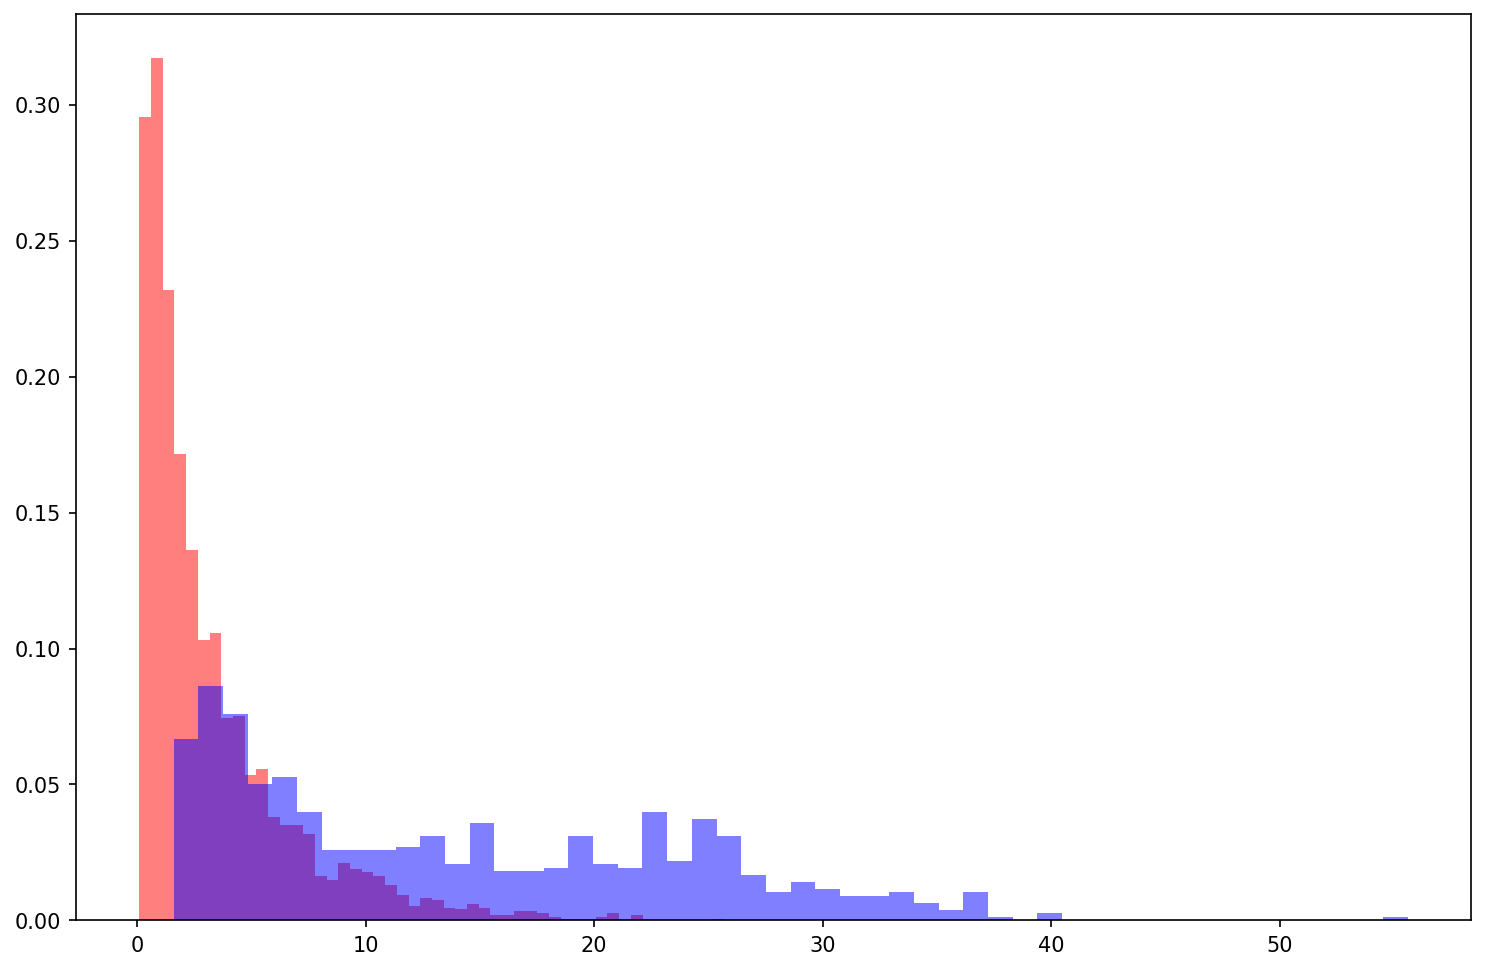

In [20]:
print(np.mean(sol[:,-1]))
print(np.std(sol[:,-1]))

fig,ax = plt.subplots(1,1,figsize=(12,8),dpi=150)

ax.hist(sol[net.C_all[0],-1],50,color='r',alpha=0.5,density=True)
ax.hist(sol[net.C_all[1],-1],50,color='b',alpha=0.5,density=True)

plt.show()